In [4]:
import os
import win32com.client as win32
import time
import pandas as pd

aspen = win32.Dispatch("Apwn.Document")
aspen.InitFromArchive2(os.path.abspath("D:/saf_hdo/aspen/250924_pyrolysis_oil_CC_1.apw"))
aspen.Visible = True
aspen.SuppressDialogs = True

In [5]:
# aspen.Engine.Run2()
rxtor1 = aspen.Tree.FindNode("\Data\Blocks\R-201\Input\CONV")
rxtor2 = aspen.Tree.FindNode("\Data\Blocks\R-202\Input\CONV")
rxtor3 = aspen.Tree.FindNode("\Data\Blocks\R-203\Input\CONV")

hdo_prod = aspen.Tree.FindNode("\Data\Streams\\208\Output\MASSFLOW\MIXED")

In [6]:
hdo_WATER = hdo_prod.Elements("WATER")
hdo_C21 = hdo_prod.Elements("C21H24O5")

print("  RXN 30 || Produced WATER || Produced C21H24O5")
print(f"{rxtor1.Elements('30').Value} || {hdo_WATER.Value} || {hdo_C21.Value}")

rxtor1.Elements("30").Value = 0.1
time.sleep(2)
aspen.Engine.Run2()
time.sleep(2)

print(f"{rxtor1.Elements('30').Value} || {hdo_WATER.Value} || {hdo_C21.Value}")

  RXN 30 || Produced WATER || Produced C21H24O5
1.0 || 14124.4453 || 0.0
0.1 || 13724.0476 || 1584.31258


In [7]:
data_path = "D:\saf_hdo\HDO_exp.xlsx"
xls = pd.ExcelFile(data_path)
data = pd.read_excel(xls).fillna(0)

In [8]:
component_list = [
    'BIOMASS', 'WATER', 'H2', 'O2', 'N2', 'AR', 'CO', 'CO2', 'CH4',
    'C2H4', 'C2H4O', 'C2H4O2', 'C2H6', 'C2H6O', 'C3H6', 'C3H8',
    'C3H8O', 'C3H8O2', 'C4H10', 'C4H4O', 'C4H8O', 'C5H4O2', 'C5H12',
    'C6H6', 'C6H6O', 'C6H8O', 'C6H12', 'C6H12O6', 'C6H14', 'C6H14O6',
    'C7H8', 'C7H8O', 'C7H14', 'C7H14-CY', 'C7H14-ME', 'C8H10', 'C8H10O',
    'C8H16', 'C8H18', 'C8H16-CY', 'C9H10O3', 'C9H18', 'C9H20', 'C9H20-A',
    'C10H22-C', 'C11H14O', 'C11H20-C', 'C11H24', 'C12H16O2', 'C12H20-C',
    'C12H26', 'C13H18O2', 'C13H20O2', 'C13H26', 'C13H28', 'C14H12',
    'C14H20O2', 'C14H28A', 'C14H30', 'C15H28', 'C16H32', 'C16H34',
    'C17H34', 'C17H36', 'C18H38', 'C19H24O2', 'C19H38', 'C19H40', 'C20H40',
    'C20H42', 'C21H24O5', 'C21H42', 'C22H26O5', 'C22H44', 'C23H28O5',
    'C23H46', 'C24H32O3', 'C24H48', 'C25H30O3', 'C25H50', 'C26H42O4',
    'C26H52', 'C27H54', 'C28H56', 'C29H58', 'C30H62', 'SO2', 'NO2',
    'ACIDS', 'ALDEHYDE', 'KETONES', 'ALCOHOLS', 'GUAIACOL', 'LMWS',
    'HMWS', 'EXTRACTI', 'N2COMP', 'SCOMPOUN', 'S', 'C', 'ASH', 'SIO2',
    'LMWLA', 'LMWLB', 'HLB', 'NH3'
]
component_to_carbon_number = {
    "ACIDS": 4,
    "ALDEHYDE": 8,
    "KETONES": 3,
    "ALCOHOLS": 6,
    "GUAIACOL": 7,
    "LMWS": 6,
    "HMWS": 12,
    "EXTRACTI": 20,
    # "N2COMP": 8,  # TODO: do we count them?
    # "SCOMPOUN": 12,
    "LMWLA": 16,
    "LMWLB": 12,
    "HLB": 17,
}
carbon_number_list = data['Carbon'].tolist()
carbon_number_to_component = {n: [c for c in component_list if f"C{n}" in c] for n in carbon_number_list}
for c, n in component_to_carbon_number.items():
    if n in carbon_number_list:
        carbon_number_to_component[n].append(c)

hdo_rxtors = [rxtor1, rxtor2, rxtor3]
n_rxns = [len(r.Elements) for r in hdo_rxtors]

hdo_prod_composition = [hdo_prod.Elements(c).Value for c in component_list]

# node = aspen.Tree.FindNode(f"\Data\Streams\\208\Output\MASSFLOW\MIXED")
# massflow = [0 if node.Elements(c).Value is None else node.Elements(c).Value for c in component_list]
# total_massflow = sum(massflow)
# carbon_number_composition = {n: sum([massflow[component_list.index(c)]/total_massflow for c in cs]) for n, cs in carbon_number_to_component.items()}


In [9]:
def get_carbon_number_composition(stream_no):
    node = aspen.Tree.FindNode(f"\Data\Streams\\{stream_no}\Output\MASSFLOW\MIXED")
    massflow = [0 if node.Elements(c).Value is None else node.Elements(c).Value for c in component_list]
    total_massflow = sum(massflow)
    carbon_number_composition = {n: sum([massflow[component_list.index(c)]/total_massflow for c in cs]) for n, cs in carbon_number_to_component.items()}
    return carbon_number_composition

get_carbon_number_composition(208)

{6: 0.008563108717343856,
 7: 0.010174536360311846,
 8: 0.015492652320538054,
 9: 0.03374726898480269,
 10: 0.021976491703757588,
 11: 0.02340851629752672,
 12: 0.02097552111615141,
 13: 0.029146371762567912,
 14: 0.009941343016103612,
 15: 0.012137583920344626,
 16: 0.005601037522565215,
 17: 0.0031051141264400606,
 18: 0.0029491868117174965,
 19: 0.0014447330485379778,
 20: 0.0009121204769747764,
 21: 0.04093845935414537,
 22: 0.0,
 23: 0.027531712366172897,
 24: 0.027531711590976265,
 25: 0.21905666483368488,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0}

In [20]:
case_target = 'a'
target_sum = sum(data[case_target])
target_data = {n: c / target_sum for n, c in zip(data['Carbon'], data[case_target])}

r_now = []
for ii, rr in enumerate(hdo_rxtors):
    rii = []
    for n in range(n_rxns[ii]):
        rii.append(rr.Elements(f"{n+1}").Value)
    r_now.append(rii)


def get_hdo_results(rxn_coef):
    print(rxn_coef)
    for n in range(n_rxns[0]):
        rxtor1.Elements(f"{n+1}").Value = rxn_coef[0][n]

    time.sleep(2)
    aspen.Engine.Run2()
    time.sleep(2)

    prod = get_carbon_number_composition(208)
    mse = sum((target_data[n] - prod[n])**2 for n in target_data.keys()) * 10
    print(f"Success: {mse}")
    return mse


r_new = [r_now[0].copy()]
r_new[0][29] = 1.0
print(get_hdo_results(r_new))

[[0.34088959226, 0.97201546436, 0.02990149127, 0.1555813351, 0.50839333951, 0.76761167971, 0.77730713531, 0.02348564511, 0.39949197375, 0.96066555669, 0.04725509868, 0.83119175654, 0.94420017135, 0.34883520808, 0.33051143542, 0.95475524013, 0.26690588155, 0.55437028184, 0.56686090414, 0.02532012575, 0.4071764303, 0.03669451143, 0.41992608307, 0.76637436758, 0.40590459523, 0.4951582329, 0.85852475296, 0.49021833067, 0.63466056996, 1.0, 0.12268916907, 0.35995609199, 0.57178894621, 0.0213433618, 0.55017301516]]
Success: 1.120135353622435
1.120135353622435


[[0.24000005 0.11527472 0.16327457 0.78278435 0.49455495 0.23544936
  0.34158313 0.70807685 0.36761533 0.26208028 0.99191212 0.50774385
  0.62938507 0.37197476 0.92279272 0.78947605 0.16531857 0.42373139
  0.25804518 0.39344602 0.14671234 0.13083028 0.89788563 0.97094347
  0.33653079 0.75560412 0.94180689 0.01258728 0.26679685 0.63310718
  0.02819507 0.92468512 0.94097064 0.50255458 0.62792458]]
Success: 1.1033908058323834
[[0.30007221 0.58584895 0.52482347 0.51584873 0.86794944 0.90558667
  0.0997366  0.84891662 0.94881292 0.45047156 0.07054222 0.73355809
  0.21525612 0.45331363 0.44021201 0.76973768 0.91307987 0.89274048
  0.39612403 0.28239208 0.18290969 0.16427895 0.41192156 0.83685124
  0.01244977 0.99118399 0.88919434 0.42676762 0.29299435 0.45343961
  0.63092773 0.84589954 0.16956535 0.70411096 0.9804528 ]]
Success: 1.2442044945193733
[[0.46411336 0.41931846 0.79836783 0.0205648  0.40252191 0.60682992
  0.19547446 0.39911661 0.08059678 0.21334719 0.87216651 0.73740312
  0.442778

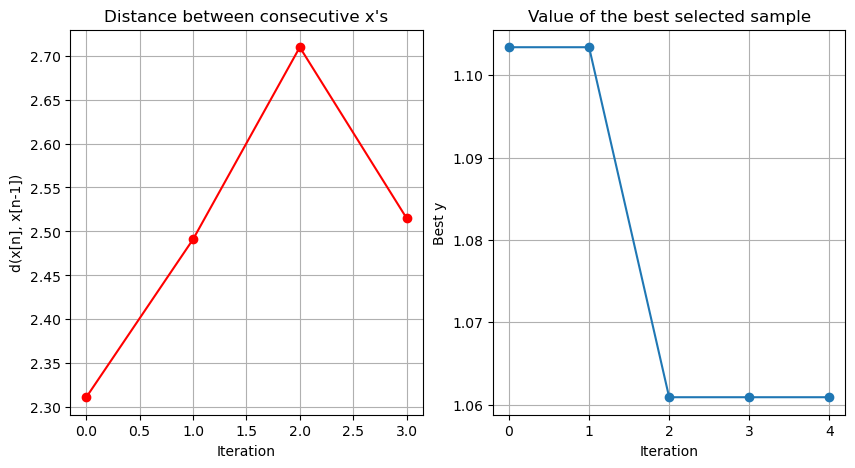

In [23]:
from GPyOpt.methods import BayesianOptimization

domain = [
    {'name': f'rxn1_coef{i}', 'type': 'continuous', 'domain': (0, 1)} for i in range(n_rxns[0])
]

optimizer = BayesianOptimization(
    f=get_hdo_results,
    domain=domain,
    acquisition_type='EI',
    acquisition_optimizer_type='lbfgs',
    max_iter=500,
    exact_feval=True,
    maximize=False,
    verbosity=1,
)
optimizer.run_optimization()
optimal_rxn_coef = optimizer.x_opt

optimizer.plot_convergence()

Test function:
[[0.34088959 0.97201546 0.02990149 0.15558134 0.50839334 0.76761168
  0.77730714 0.02348565 0.39949197 0.96066556 0.0472551  0.83119176
  0.94420017 0.34883521 0.33051144 0.95475524 0.26690588 0.55437028
  0.5668609  0.02532013 0.40717643 0.03669451 0.41992608 0.76637437
  0.4059046  0.49515823 0.85852475 0.49021833 0.63466057 0.49318444
  0.12268917 0.35995609 0.57178895 0.02134336 0.55017302]]
Success: 1.1566406526340103
[[0.34088959 0.97201546 0.02990149 0.15558134 0.50839334 0.76761168
  0.77730714 0.02348565 0.39949197 0.96066556 0.0472551  0.83119176
  0.94420017 0.34883521 0.33051144 0.95475524 0.26690588 0.55437028
  0.5668609  0.02532013 0.40717643 0.03669451 0.41992608 0.76637437
  0.4059046  0.49515823 0.85852475 0.49021833 0.63466057 0.49318444
  0.12268917 0.35995609 0.57178895 0.02134336 0.55017302]]
Success: 1.1566406526340103
[[0.63521492 0.37395841 0.64551679 0.9000402  0.61255284 0.1049639
  0.39369896 0.35359751 0.71637306 0.00988493 0.83279629 0.44756

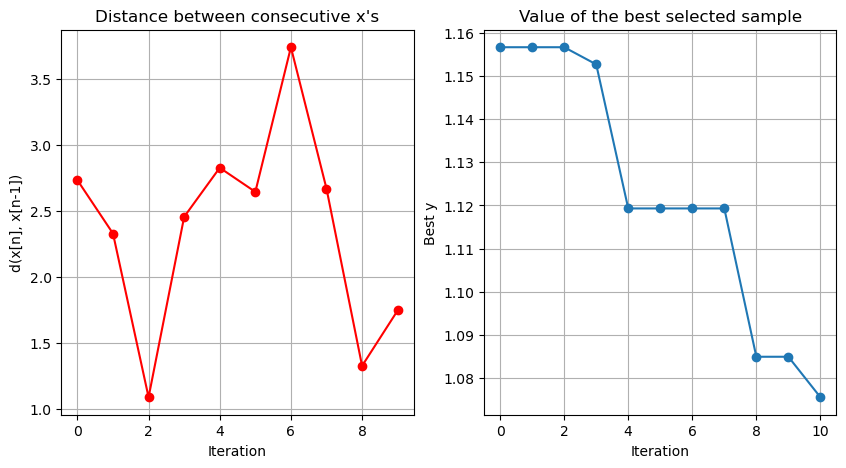

In [29]:
import GPy
import GPyOpt
from GPyOpt.methods import ModularBayesianOptimization
import numpy as np

r_init_np = np.array(r_now[0]).reshape(1, -1)

def get_hdo_results_numpy(rxn_coef):
    print(rxn_coef)
    for n in range(n_rxns[0]):
        rxtor1.Elements(f"{n+1}").Value = rxn_coef[0, n]

    time.sleep(2)
    aspen.Engine.Run2()
    time.sleep(2)

    prod = get_carbon_number_composition(208)
    mse = sum((target_data[n] - prod[n])**2 for n in target_data.keys()) * 10
    print(f"Success: {mse}")
    return mse

# print("Test function:")
# get_hdo_results_numpy(r_init_np)

# Kernel function for Bayesian optimization: m52
m52 = GPy.kern.Matern52(input_dim=r_init_np.shape[1], variance=1.0, lengthscale=1.0)

objective = GPyOpt.core.task.SingleObjective(get_hdo_results_numpy)

# Gaussian process regression model
model = GPyOpt.models.GPModel(kernel=m52, exact_feval=True,
                              optimize_restarts=25, verbose=False)

# Acquisition function: Expected improvement (EI)
domain_space = GPyOpt.Design_space(space=domain)

acquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(domain_space)
acquisition = GPyOpt.acquisitions.AcquisitionEI(model, domain_space, optimizer=acquisition_optimizer)
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

# Set Bayesian optimization
BO = ModularBayesianOptimization(model, domain_space, objective, acquisition, evaluator, r_init_np)

# Maximum time and iterations for Bayesian optimization
max_time = None
max_iter = 10
tolerance = -np.inf

# Run Bayesian optimization
BO.run_optimization(max_iter=max_iter, max_time=max_time, eps=tolerance, verbosity=False)
BO.plot_convergence()

In [85]:
# Close the file without saving
# SaveOption: 0 = Do not save changes
#             1 = Save changes
#             2 = Prompt the user
aspen.Close(0)
aspen.Close(0)